# Profiles

This notebook demonstrates profile and multi-profile analysis using `bathy`.

In [1]:
from bathy import Bathymetry, Profile, profile

## Download example data

Download bathymetry data for the NE Atlantic from the GEBCO OPeNDAP server.

In [2]:
import os

data_path = "../data/ne_atlantic_gebco.nc"

if not os.path.exists(data_path):
    print("Downloading NE Atlantic bathymetry from GEBCO...")
    Bathymetry.from_gebco_opendap(
        lon_range=(-12.08, -5.23),
        lat_range=(46.05, 49.54),
        save_path=data_path,
    )
    print(f"Downloaded and saved to {data_path}")
else:
    print(f"Using existing file: {data_path}")

Using existing file: ../data/ne_atlantic_gebco.nc


Alternatively, load from a local file:

In [3]:
# Example: load from a local file (not used in this notebook)
# bath = Bathymetry("path/to/your/bathymetry.nc")

## Load data

In [4]:
# Load the bathymetry data
bath = Bathymetry(data_path)
print(bath)

Bathymetry(shape=(839, 1645), lon=[-12.08, -5.23], lat=[46.05, 49.54])


## Single profile

Distance: 339.0 km
Points: 679


(<Figure size 1200x500 with 1 Axes>,
 [<Axes: xlabel='Distance (km)', ylabel='Elevation (m)'>])

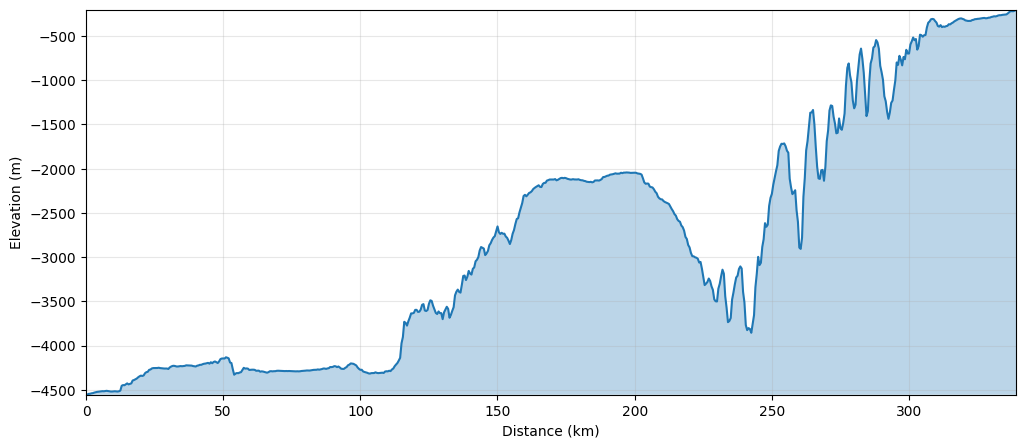

In [5]:
# Create a profile
prof = bath.profile((-11.0, 47.5), (-6.5, 47.5), point_spacing=0.5, name="East-West Profile")

print(f"Distance: {prof.distances[-1]:.1f} km")
print(f"Points: {len(prof.distances)}")

prof.plot()

## Profile with smoothing

(<Figure size 1200x500 with 1 Axes>,
 [<Axes: xlabel='Distance (km)', ylabel='Elevation (m)'>])

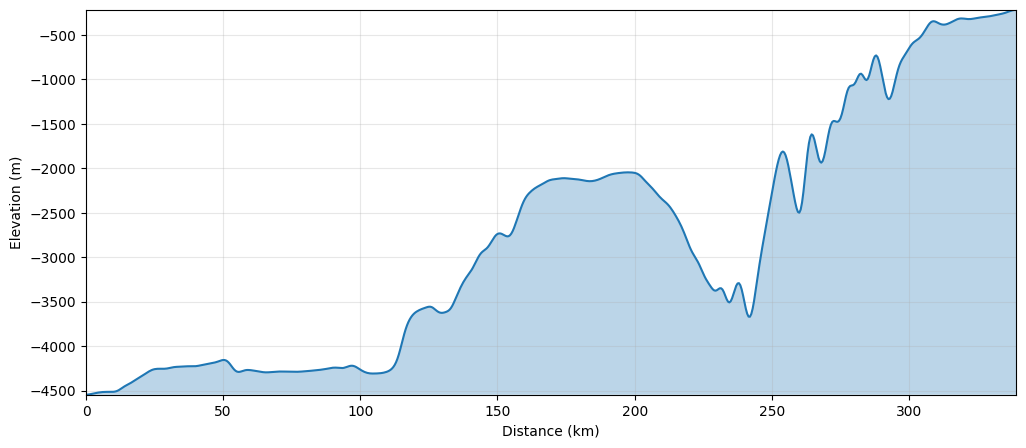

In [6]:
# Compare different smoothing levels
prof.plot(smooth=3.0)

## Canyon identification

In [7]:
# Identify canyons
canyons = prof.get_canyons(prominence=500)
canyons

floor_distance,floor_elevation,width_start,width_end,width,depth,cross_sectional_area
f64,f64,f64,f64,f64,f64,f64
234031.788688,-3734.0,224530.498122,238532.400009,14001.901887,630.0,3.5532e6
242532.943406,-3854.0,238532.400009,245533.350953,7000.950944,750.0,2.8874e6
260535.388689,-2906.0,254534.573595,263035.728312,8501.154717,1192.0,4.4596e6
269036.543407,-2136.0,265036.00001,271036.815105,6000.815095,800.0,3.0789e6
280038.037747,-1317.0,278037.766049,281538.24152,3500.475472,507.0,984383.709472
284538.649068,-1405.0,282538.377369,287038.98869,4500.611321,763.0,1.5182e6
292539.73586,-1436.0,288039.124539,302041.026427,14001.901887,890.0,4.7937e6


## Visualize canyons

(<Figure size 1200x500 with 1 Axes>,
 [<Axes: xlabel='Distance (km)', ylabel='Elevation (m)'>])

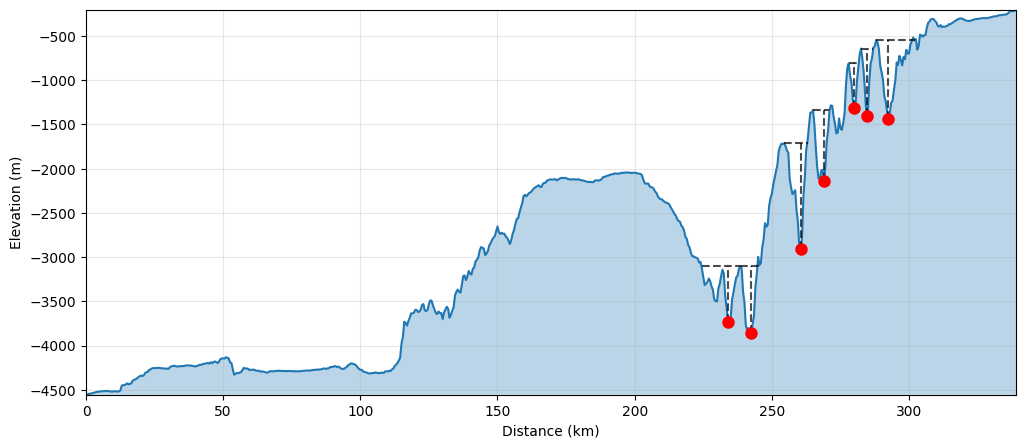

In [8]:
# Plot with canyons highlighted
prof.plot_canyons(prominence=500)

## Multiple profiles

Compare multiple parallel profiles.

In [9]:
# Create multiple profiles
profile_list = []

for lat in [46.5, 47.5, 48.5, 49.0]:
    p = bath.profile((-11.0, lat), (-6.5, lat), num_points=200, name=f"{lat}°N")
    profile_list.append(p)

print(f"Created {len(profile_list)} profiles")

Created 4 profiles


(<Figure size 1000x800 with 1 Axes>,
 <Axes: xlabel='Longitude (°)', ylabel='Latitude (°)'>)

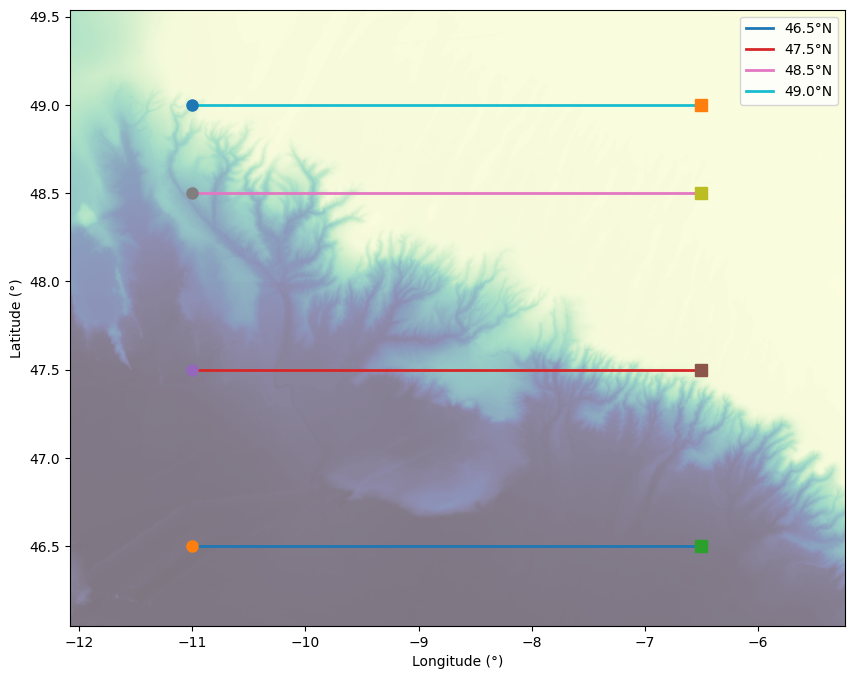

In [10]:
profile.plot_profiles_map(profile_list)

### Compare Profiles

(<Figure size 1200x600 with 1 Axes>,
 [<Axes: xlabel='Distance (km)', ylabel='Elevation (m)'>])

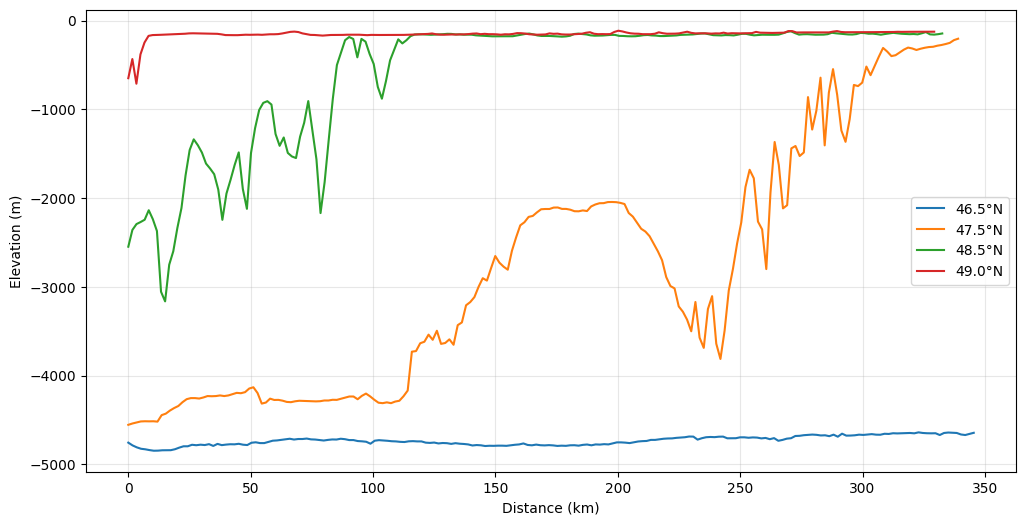

In [11]:
profile.plot_profiles(profile_list)

### Compare statistics

In [12]:
profile.compare_stats(profile_list)

statistic,46.5°N,47.5°N,48.5°N,49.0°N
str,f64,f64,f64,f64
"""total_distance""",345.431668,339.046052,332.556347,329.273069
"""min_elevation""",-4846.0,-4554.0,-3163.0,-710.0
"""max_elevation""",-4639.0,-203.0,-119.0,-113.0
"""mean_elevation""",-4732.64,-2810.715,-584.895,-153.63
"""median_elevation""",-4734.0,-2959.5,-167.5,-147.0
"""std_elevation""",51.246662,1389.131295,743.509754,60.70505
"""elevation_range""",207.0,4351.0,3044.0,597.0


## Perpendicular cross-sections

Create cross-sections perpendicular to a profile at regular intervals.

Created 19 cross-sections


(<Figure size 1000x800 with 1 Axes>,
 <Axes: xlabel='Longitude (°)', ylabel='Latitude (°)'>)

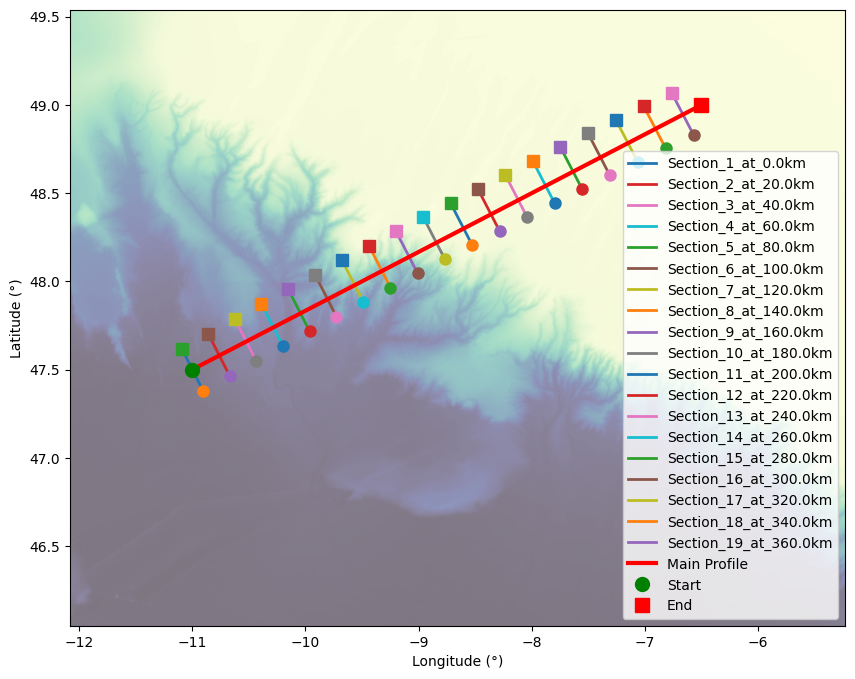

In [13]:
# Create a profile
main_profile = bath.profile((-11.0, 47.5), (-6.5, 49.0), point_spacing=1.0, name="Main Profile")

# Create cross-sections every 20 km with 30 km total width
cross_sections = Profile.cross_sections(bath.data, main_profile, interval_km=20, section_width_km=30, num_points=50)

print(f"Created {len(cross_sections)} cross-sections")

profile.plot_profiles_map(cross_sections, main_profile=main_profile)

(<Figure size 2100x700 with 6 Axes>,
 array([<Axes: title={'center': 'Section_1_at_0.0km (30.0 km)'}, xlabel='Distance (km)', ylabel='Elevation (m)'>,
        <Axes: title={'center': 'Section_2_at_20.0km (30.0 km)'}, xlabel='Distance (km)', ylabel='Elevation (m)'>,
        <Axes: title={'center': 'Section_3_at_40.0km (30.0 km)'}, xlabel='Distance (km)', ylabel='Elevation (m)'>,
        <Axes: title={'center': 'Section_4_at_60.0km (30.0 km)'}, xlabel='Distance (km)', ylabel='Elevation (m)'>,
        <Axes: title={'center': 'Section_5_at_80.0km (30.0 km)'}, xlabel='Distance (km)', ylabel='Elevation (m)'>,
        <Axes: title={'center': 'Section_6_at_100.0km (30.0 km)'}, xlabel='Distance (km)', ylabel='Elevation (m)'>],
       dtype=object))

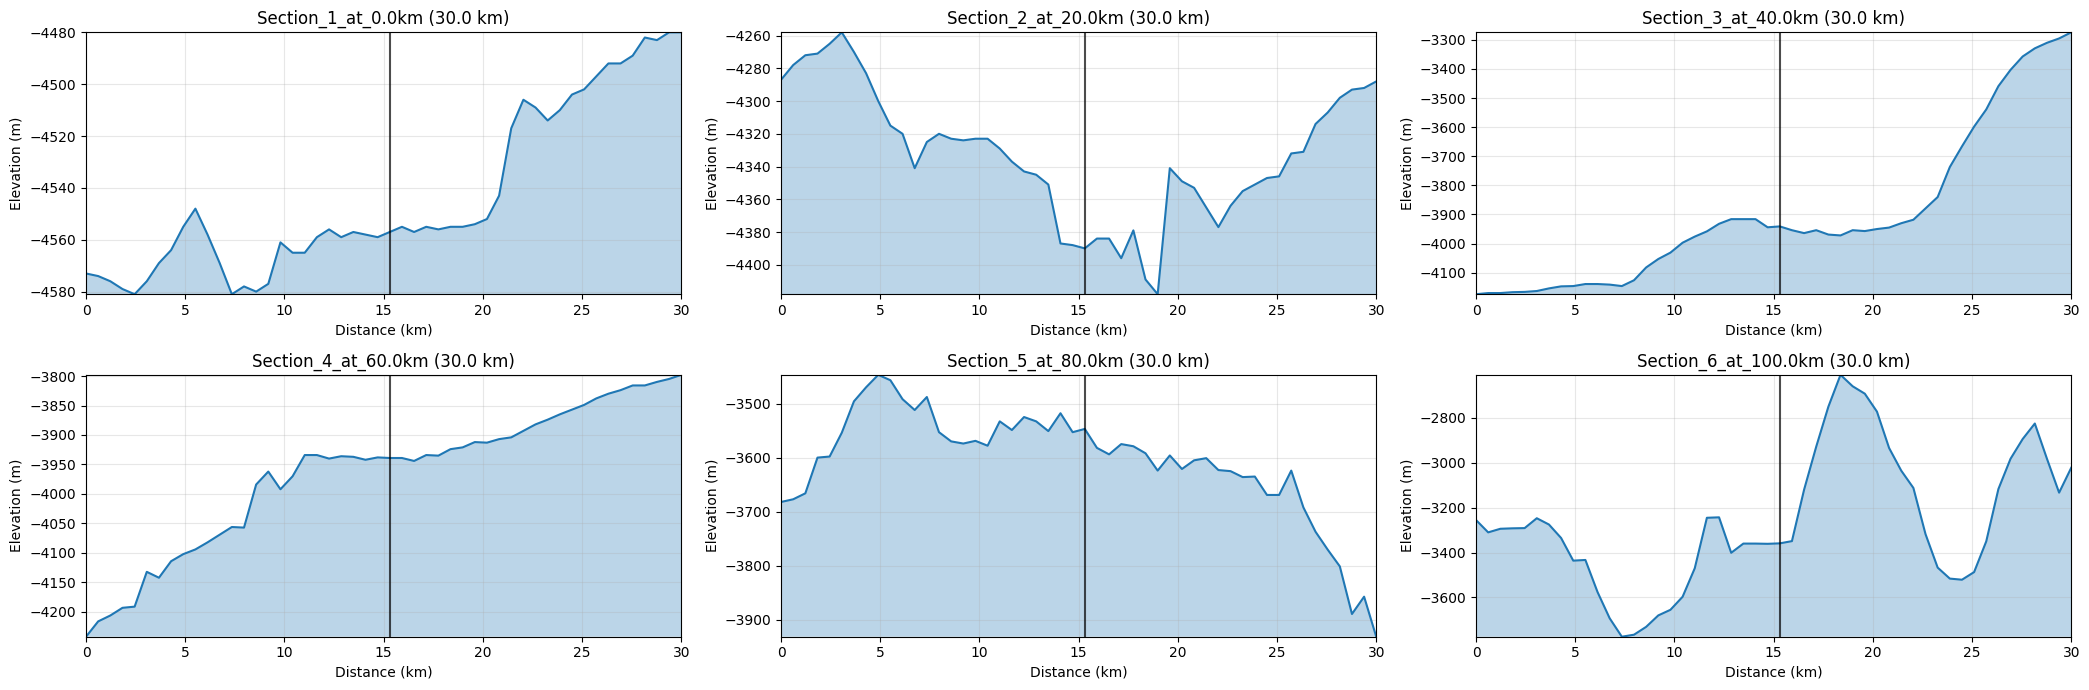

In [14]:
# Plot cross-sections in grid with main profile intersection marked
profile.plot_profiles_grid(cross_sections[:6], cols=3, main_profile=main_profile)

## Shapefile import

Load profiles from a shapefile of linestrings.

WARNING - bathy.profile: Skipped 8585 feature(s) outside DEM bounds or with unsupported geometry


Loaded 62 canyon profiles


(<Figure size 1400x1750 with 10 Axes>,
 array([<Axes: title={'center': 'Feature_4769 (66.6 km)'}, xlabel='Distance (km)', ylabel='Elevation (m)'>,
        <Axes: title={'center': 'Feature_4770 (52.1 km)'}, xlabel='Distance (km)', ylabel='Elevation (m)'>,
        <Axes: title={'center': 'Feature_4776 (49.1 km)'}, xlabel='Distance (km)', ylabel='Elevation (m)'>,
        <Axes: title={'center': 'Feature_4777 (80.0 km)'}, xlabel='Distance (km)', ylabel='Elevation (m)'>,
        <Axes: title={'center': 'Feature_4778 (18.1 km)'}, xlabel='Distance (km)', ylabel='Elevation (m)'>,
        <Axes: title={'center': 'Feature_4779 (36.9 km)'}, xlabel='Distance (km)', ylabel='Elevation (m)'>,
        <Axes: title={'center': 'Feature_4780 (23.5 km)'}, xlabel='Distance (km)', ylabel='Elevation (m)'>,
        <Axes: title={'center': 'Feature_4781 (8.2 km)'}, xlabel='Distance (km)', ylabel='Elevation (m)'>,
        <Axes: title={'center': 'Feature_4782 (51.5 km)'}, xlabel='Distance (km)', ylabel='Elevati

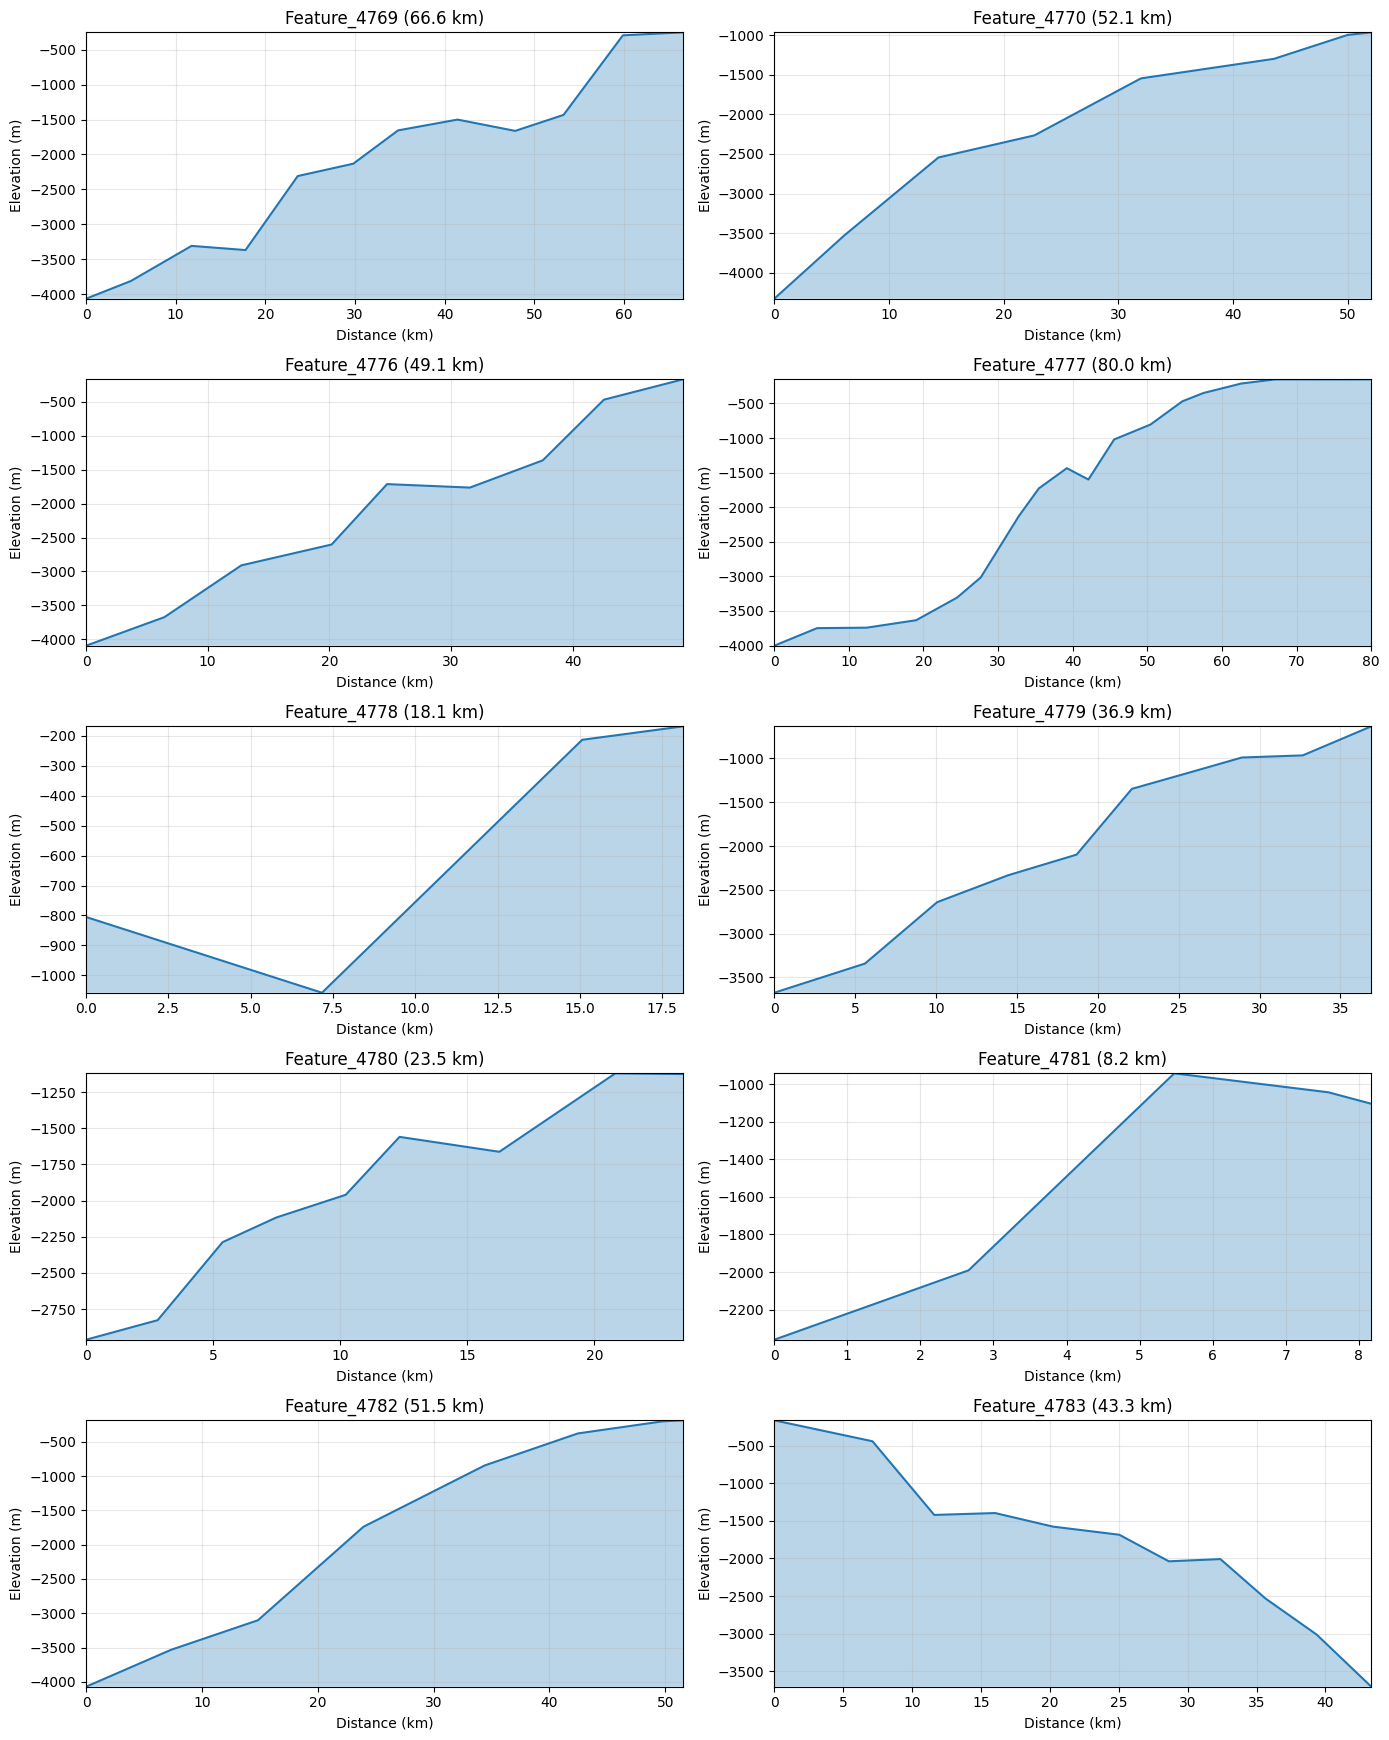

In [15]:
# Load bathymetry data for the Celtic margin
bath_clipped = Bathymetry("../data/gebco_2025_bathymetry.nc", lon_range=(-12, -5), lat_range=(46, 52))

# Load profiles from Global Canyons shapefile
canyon_profiles = Profile.from_shapefile(
    bath_clipped.data,
    "../data/shp/Global_Canyons.shp",
    id_column="NAME",
)

print(f"Loaded {len(canyon_profiles)} canyon profiles")

# Plot first 10 profiles in a grid
profile.plot_profiles_grid(canyon_profiles[:10])

### Visualise profiles on a map

(<Figure size 1000x800 with 1 Axes>,
 <Axes: xlabel='Longitude (°)', ylabel='Latitude (°)'>)

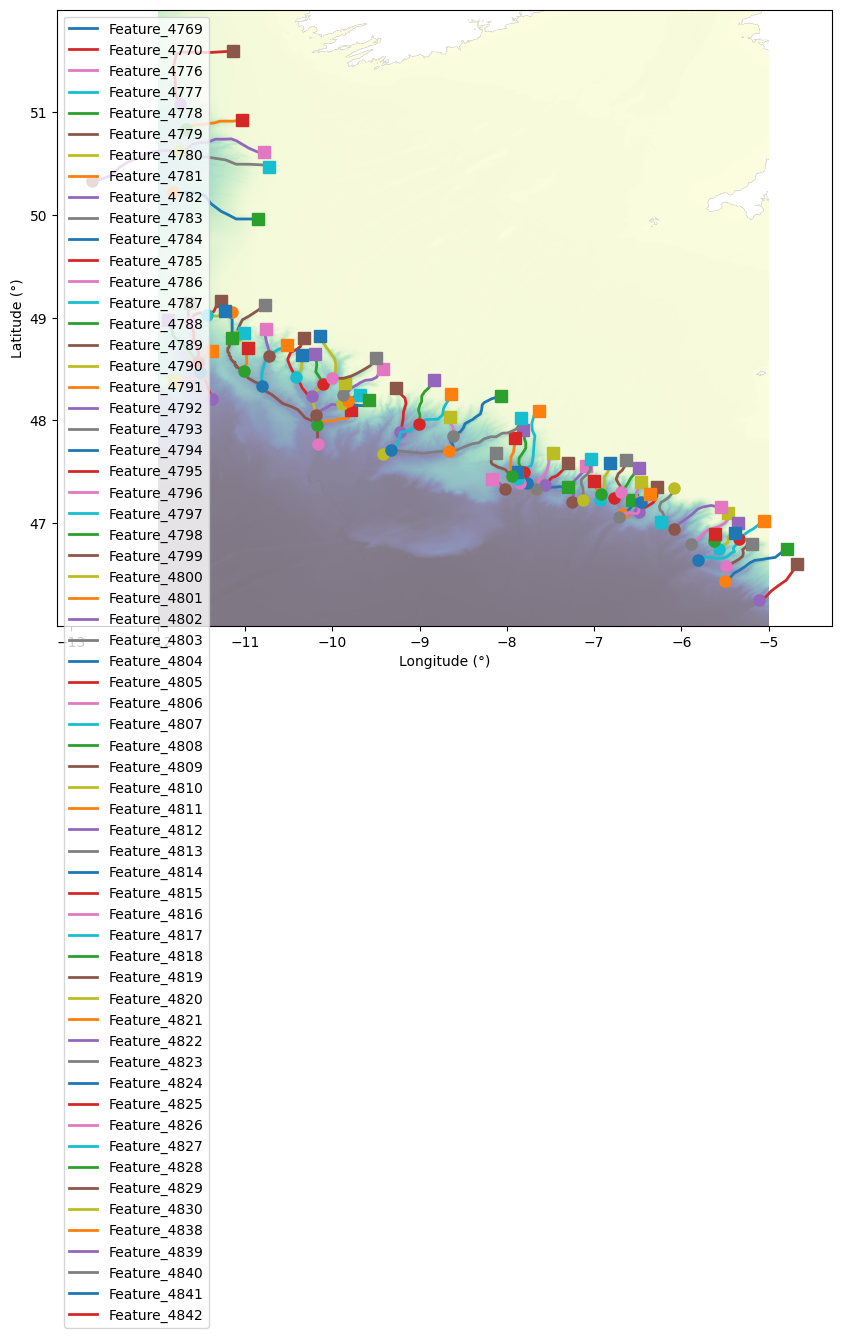

In [16]:
# Plot canyon locations on map
profile.plot_profiles_map(canyon_profiles)